In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from tqdm import tqdm

#Defining symbols
s_12=Symbol("s_12",real=True)
s_23=Symbol("s_23",real=True)
s_13=Symbol("s_13",real=True)

c_12=Symbol("c_12",real=True)
c_23=Symbol("c_23",real=True)
c_13=Symbol("c_13",real=True)

d_cp=Symbol("d_cp",real=True)

D_m_12=Symbol("D_m_12",real=True)
D_m_13=Symbol("D_m_13",real=True)
D_m_23=Symbol("D_m_23",real=True)

L=Symbol("L",real=True,positive=True)
E_nu=Symbol("E_nu",real=True)


def PMNS_param_matrix():
    m=Matrix([
        [c_12*c_13,s_12*c_13,s_13*exp(-d_cp*1j)],
        [-s_12*c_23-c_12*s_23*s_13*exp(d_cp*1j),c_12*c_23-s_12*s_23*s_13*exp(d_cp*1j),s_23*c_13],
        [s_12*s_23-c_12*c_23*s_13*exp(d_cp*1j),-c_12*s_23-s_12*c_23*s_13*exp(d_cp*1j),c_23*c_13]])

    return m

PMNS=PMNS_param_matrix()

def Prob_a_to_b(a,b):
    """ 
    Parameters:
    a: flavor of the neutrino in the initial state
    b: flavor of the neutrino in the final state

    Function:
    Calculates the probability of a neutrino of flavor a to transform into flavor b, as
    a function of the mixing angles ,the mass differences, the distance traveled and the 
    energy of the neutrino.
    """
    if a == "e":
        index_a=0
    elif a == "mu":
        index_a=1
    elif a == "tau":
        index_a=2
    else:
        raise ValueError("Non existing neutrino flavor for initial state.")
    
    if b == "e":
        index_b=0
    elif b == "mu":
        index_b=1
    elif b == "tau":
        index_b=2
    else:
        raise ValueError("Non existing neutrino flavor for final state.")

    f=PMNS[index_b,0]*conjugate(PMNS[index_a,0])*PMNS[index_a,1]*conjugate(PMNS[index_b,1])
    s=PMNS[index_b,0]*conjugate(PMNS[index_a,0])*PMNS[index_a,2]*conjugate(PMNS[index_b,2])
    t=PMNS[index_b,1]*conjugate(PMNS[index_a,1])*PMNS[index_a,2]*conjugate(PMNS[index_b,2])

    first=re(f)*sin((D_m_12*L)/(4*E_nu))**2
    second=re(s)*sin((D_m_13*L)/(4*E_nu))**2
    third=re(t)*sin((D_m_23*L)/(4*E_nu))**2

    if a==b:
        return 1-4*(first+second+third)
    else:
        return -4*(first+second+third)


""" 
These functions are returning the sin and the cos respectively of the mixing angles.
"""
#The values where taken from the JUNO physics book
def s_ij(i,j):
    if (i==1 and j==2) or (i==2 and j==1):
        return 0.302**(1/2)
    elif (i==1 and j==3) or (i==3 and j==1):
        return 0.0227**(1/2)
    elif (i==2 and j==3) or (i==3 and j==2):
        return 0.413**(1/2)
    elif (i==j):
        raise ValueError("Not mixing! i=j")
    else:
        raise ValueError("Not excisting eigenstates! Must be 1,2 or 3.")

def c_ij(i,j):
    return (1-(s_ij(i,j)**2))**(1/2)

delta_cp=300

#Defining the possible flavors as strings
e="e"
mu="mu"
tau="tau"

#flavors=[e,mu,tau]
flavors=[e]




In [53]:
#These variables are used fot the plots
dist=np.arange(0,13000,1)

eneg_range_1=np.arange(0.001,0.1,0.00001)
eneg_range_2=np.arange(0.1,10,0.001)    

list_of_all=[]

#Calculating the probabilities for all flavors
for a in tqdm(flavors):
    for b in tqdm([e,mu]):
        #Replacing sin and cos by their values known from experiments
        Equation=Prob_a_to_b(a,b).subs([(s_12,s_ij(1,2)),(c_12,c_ij(1,2)),(c_13,c_ij(1,3)),(c_23,c_ij(2,3)),(s_13,s_ij(1,3)),(s_23,s_ij(2,3)),(d_cp,delta_cp)])

        #Creating different equation for different values of energy
        eq_1_E=Equation.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(E_nu,10)])
        eq_2_E=Equation.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(E_nu,1)])
        eq_3_E=Equation.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(E_nu,0.1)]) 

        #Creating different equation for different distances
        eq_1_d=Equation.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(L,15)])
        eq_2_d=Equation.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(L,13000)]) 

        to_plot_1_E=np.zeros(len(dist))
        to_plot_2_E=np.zeros(len(dist))
        to_plot_3_E=np.zeros(len(dist))

        to_plot_1_d=np.zeros(len(eneg_range_1)+len(eneg_range_2))
        to_plot_2_d=np.zeros(len(eneg_range_1)+len(eneg_range_2))

        print("Calculation for "+a+" to "+b+" started!")
        #print("Calculation for the function of distance for "+a+" to "+b+" started!")
        for i,l in enumerate(dist):
            to_plot_1_E[i]=(eq_1_E.subs([(L,l)]))
            to_plot_2_E[i]=(eq_2_E.subs([(L,l)]))
            to_plot_3_E[i]=(eq_3_E.subs([(L,l)]))
        #print("Distance Done!")


        #print("Calculation for the function of energy for "+a+" to "+b+" started!")
        for j,n in enumerate(eneg_range_1):
            to_plot_1_d[j]=(eq_1_d.subs([(E_nu,n)]))
            to_plot_2_d[j]=(eq_2_d.subs([(E_nu,n)]))
        #print("First Done!")
        for j,n in enumerate(eneg_range_2):
            to_plot_1_d[len(eneg_range_1)+j]=(eq_1_d.subs([(E_nu,n)]))
            to_plot_2_d[len(eneg_range_1)+j]=(eq_2_d.subs([(E_nu,n)]))
        #print("Second Done!")
        #print("Done!")
        
        title="P(nu_"+a+"->nu_"+b+")" 

        to_append=np.array([title,to_plot_1_E,to_plot_2_E,to_plot_3_E,to_plot_1_d,to_plot_2_d],dtype=object)
        list_of_all.append(to_append)

  0%|          | 0/1 [00:00<?, ?it/s]

Calculation for e to e started!


Calculation for e to mu started!


100%|██████████| 1/1 [10:08<00:00, 608.44s/it]


In [37]:
theta_12=Symbol("theta_12")
theta_23=Symbol("theta_23")
theta_13=Symbol("theta_13")

In [38]:
simplify(Prob_a_to_b(e,e).subs([(s_12,sin(theta_12)),(c_12,cos(theta_12)),(c_13,cos(theta_13)),(c_23,cos(theta_23)),(s_13,sin(theta_13)),(s_23,sin(theta_23))]))

-4*sin(theta_12)**2*sin(theta_13)**2*sin(D_m_23*L/(4*E_nu))**2*cos(theta_13)**2 - 4*sin(theta_12)**2*sin(D_m_12*L/(4*E_nu))**2*cos(theta_12)**2*cos(theta_13)**4 - 4*sin(theta_13)**2*sin(D_m_13*L/(4*E_nu))**2*cos(theta_12)**2*cos(theta_13)**2 + 1

In [28]:
list_of_all[3][0]

'P(nu_mu->nu_mu)'

### 1,2 AND 4 are for energy and 5 and 6 are for distance

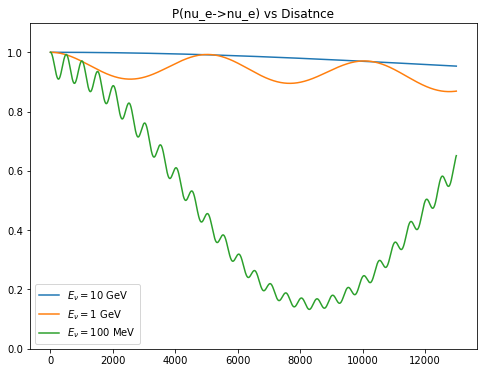

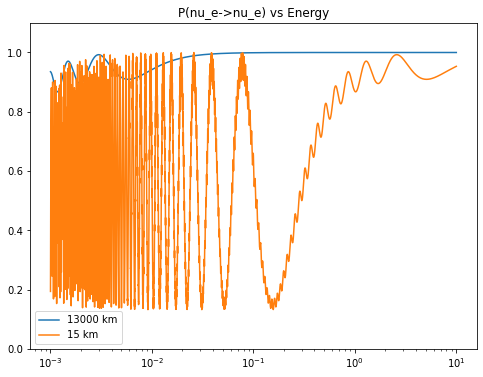

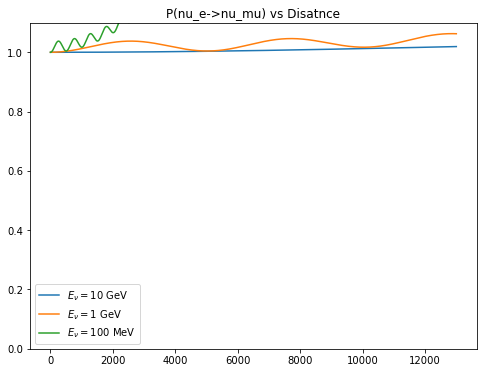

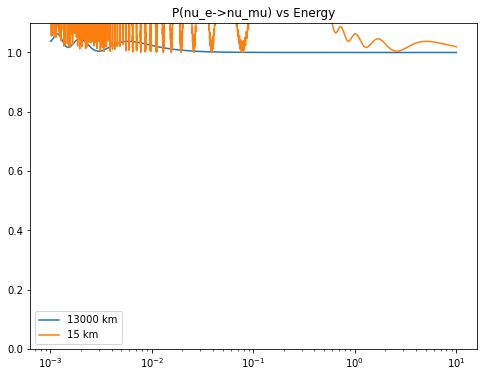

In [51]:
for type in list_of_all:
    """ if type[0]=="P(nu_e->nu_e)" or type[0]=="P(nu_mu->nu_mu)":
        plt.figure(figsize=(8,6))
        plt.title(type[0]+" vs Disatnce")
        plt.plot(dist,[1+i for i in type[1]],label=r"$E_{\nu}=10$ MeV")
        plt.plot(dist,[1+i for i in type[2]],label=r"$E_{\nu}=100$ MeV")
        plt.plot(dist,[1+i for i in type[4]],label=r"$E_{\nu}=1$ GeV")
        plt.legend()
        plt.ylim(0,1.1)

        plt.figure(figsize=(8,6))
        plt.title(type[0]+" vs Energy")
        plt.xscale("log")
        plt.plot(np.concatenate([eneg_range_1,eneg_range_2]),[1+i for i in type[5]],label="13000 km")
        plt.plot(np.concatenate([eneg_range_1,eneg_range_2]),[1+i for i in type[6]],label="15 km")
        plt.legend()
        plt.ylim(0,1.1)
    else: """

    plt.figure(figsize=(8,6))
    plt.title(type[0]+" vs Disatnce")
    plt.plot(dist,type[1],label=r"$E_{\nu}=10$ GeV")
    plt.plot(dist,type[2],label=r"$E_{\nu}=1$ GeV")
    plt.plot(dist,type[3],label=r"$E_{\nu}=100$ MeV")
    plt.legend()
    plt.ylim(0,1.1)

    plt.figure(figsize=(8,6))
    plt.title(type[0]+" vs Energy")
    plt.xscale("log")
    plt.plot(np.concatenate([eneg_range_1,eneg_range_2]),type[4],label="13000 km")
    plt.plot(np.concatenate([eneg_range_1,eneg_range_2]),type[5],label="15 km")
    plt.legend()
    plt.ylim(0,1.1)

In [4]:

def flavor_to_index(a,b):
    if a == "e":
        index_a=0
    elif a == "mu":
        index_a=1
    elif a == "tau":
        index_a=2
    else:
        raise ValueError("Non existing neutrino flavor for initial state.")
    
    if b == "e":
        index_b=0
    elif b == "mu":
        index_b=1
    elif b == "tau":
        index_b=2
    else:
        raise ValueError("Non existing neutrino flavor for final state.")
    
    return index_a,index_b

In [8]:
theta_12= 33.45  #degrees
theta_23= 42.1   #degrees
theta_13= 8.62   #degrees

delta_cp= 90    #degrees

Dm_21   = 7.42*10**(-5) #eV^2

#Normal ordering
Dm_31_no= 2.51*10**(-3) #eV^2
Dm_32_no= 2.51*10**(-3) #eV^2

#Inverse ordering
Dm_31_io= -2.49*10**(-3) #eV^2
Dm_32_io= -2.49*10**(-3) #eV^2

In [9]:
def D_mass(i,j,ordering="NO"): #for ordering: NO is normal ordering and IO inverse ordering
    if i==j:
        return ValueError("Have to find out what to do with that")
    elif i==1:
        if j==2:
            return -Dm_21
        elif j==3:
            if ordering=="NO":
                return -Dm_31_no
            else:
                return -Dm_31_io
    elif i==2 :
        if j==1:
            return Dm_21
        elif j==3:
            if ordering=="NO":
                return -Dm_32_no
            else:
                return -Dm_32_io
    elif i==3:
        if j==1:
            if ordering=="NO":
                return Dm_31_no
            else:
                return Dm_31_io
        elif j==2:
            if ordering=="NO":
                return Dm_32_no
            else:
                return Dm_32_io

In [12]:
D_m_21=Symbol("D_m_21",real=True)
D_m_31=Symbol("D_m_31",real=True)
D_m_32=Symbol("D_m_32",real=True)

L=Symbol("L",real=True,positive=True)
E_nu=Symbol("E_nu",real=True)

def D_mass_param(i,j):
    if i==j:
        return ValueError("Probably 0 but not sure yet...")
    elif i==1:
        if j==2:
            return -D_m_21
        elif j==3:
            return -D_m_31
    elif i==2 :
        if j==1:
            return D_m_21
        elif j==3:
            return -D_m_32
    elif i==3:
        if j==1:
            return D_m_31
        elif j==2:            
            return D_m_32
            

In [5]:
def norm(z):
    return sqrt(re(z)**2+im(z)**2)

In [21]:
def Prob_a_to_b_alt(a,b):
    index_a,index_b=flavor_to_index(a,b)

    fst_rhs=0
    U=PMNS_param_matrix()
    for i in [0,1,2]:
        fst_rhs+=(norm(U[index_b,i])**2)* norm(U[index_a,i])**2

    #print(fst_rhs)

    scd_rhs=0
    for i in [0,1,2]:
        for j in [0,1,2]:
            if i>j:
                scd_rhs+=U[index_b,i]*conjugate(U[index_a,i])*conjugate(U[index_b,j])*U[index_a,j]*exp((D_mass_param(i+1,j+1))*L/(2*E_nu))

    return fst_rhs+(2*re(scd_rhs))

In [43]:
thi_12=Symbol("thi_12",real=True)
thi_23=Symbol("thi_23",real=True)
thi_13=Symbol("thi_13",real=True)

In [24]:
trigsimp(Prob_a_to_b_alt(e,e).subs([(s_12,sin(thi_12)),(c_12,cos(thi_12)),(c_13,cos(thi_13)),(c_23,cos(thi_23)),(s_13,sin(thi_13)),(s_23,sin(thi_23)),(d_cp,delta_cp)])) 

(1 - cos(4*thi_12))*(cos(2*thi_13) + 1)**2*exp(D_m_21*L/(2*E_nu))/16 + 2*exp(D_m_31*L/(2*E_nu))*sin(thi_13)**2*cos(thi_12)**2*cos(thi_13)**2 + 2*exp(D_m_32*L/(2*E_nu))*sin(thi_12)**2*sin(thi_13)**2*cos(thi_13)**2 + sin(thi_12)**4*cos(thi_13)**4 + 1.0*sin(thi_13)**4 + cos(thi_12)**4*cos(thi_13)**4

In [44]:
z=exp(-1j*(thi_12-thi_13))

In [46]:
norm(z)==norm(conjugate(z))

True

In [11]:
from my_functions import PMNS_param_matrix

ImportError: cannot import name 'PMNS_param_matrix' from 'my_functions' (d:\apatsias\M1-Bonn\RWTH\code\my_functions.py)

In [14]:
from my_functions import Prob_a_to_b_General

ImportError: cannot import name 'Prob_a_to_b_General' from 'my_functions' (d:\apatsias\M1-Bonn\RWTH\code\my_functions.py)

In [15]:
from my_functions import *

normal=Prob_a_to_b_General("e","mu","normal")
anti=Prob_a_to_b_General("e","mu","anti")

print("Prob of normal:",normal)
print("Prob of anti:",anti)

print("Difference of the two:",normal-anti)


NameError: name 'Prob_a_to_b_General' is not defined

In [1]:
a=3

In [4]:
print(str(a)+" is this changed to str?")

3 is this changed to str?


In [10]:
z=1

In [11]:
z.conjugate()

1